# Lesson 1

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import libraries

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

set batchsize

In [3]:
bs = 64

## Look at the data

Using [Oxford-IIIT Pet Dataset](http://www.robots.ox.ac.uk/~vgg/data/pets/)

a helper function called `untar_data` is provided to quickly prepare the dataset

In [4]:
help(untar_data)

Help on function untar_data in module fastai.datasets:

untar_data(url:str, fname:Union[pathlib.Path, str]=None, dest:Union[pathlib.Path, str]=None, data=True, force_download=False) -> pathlib.Path
    Download `url` to `fname` if `dest` doesn't exist, and un-tgz to folder `dest`.



In [5]:
path = untar_data(URLs.PETS)
path

PosixPath('/root/.fastai/data/oxford-iiit-pet')

get the paths for images and annotations

In [6]:
path.ls()

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [7]:
path_anno = path/'annotations'
path_img = path/'images'

check image filenames

In [8]:
fnames = get_image_files(path_img)
fnames[:5]

[PosixPath('/root/.fastai/data/oxford-iiit-pet/images/samoyed_60.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/pug_139.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/staffordshire_bull_terrier_54.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/Bombay_61.jpg'),
 PosixPath('/root/.fastai/data/oxford-iiit-pet/images/beagle_125.jpg')]

notice the category names are in the filenames? we can use `regular expression` to extract them.

In [9]:
pattern = r'/([^/]+)_\d+.jpg$'

In [10]:
data = ImageDataBunch.from_name_re(
    path_img,
    fnames,
    pattern,
    ds_tfms=get_transforms(),
    size=224,
    bs=bs
).normalize(imagenet_stats)

now we can see the images

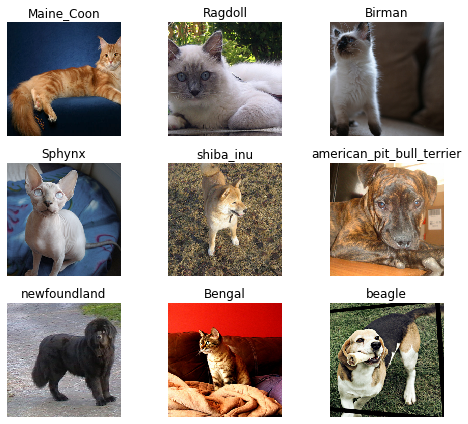

In [11]:
data.show_batch(rows=3, figsize=(7,6))

In [12]:
data.classes

['Abyssinian',
 'Bengal',
 'Birman',
 'Bombay',
 'British_Shorthair',
 'Egyptian_Mau',
 'Maine_Coon',
 'Persian',
 'Ragdoll',
 'Russian_Blue',
 'Siamese',
 'Sphynx',
 'american_bulldog',
 'american_pit_bull_terrier',
 'basset_hound',
 'beagle',
 'boxer',
 'chihuahua',
 'english_cocker_spaniel',
 'english_setter',
 'german_shorthaired',
 'great_pyrenees',
 'havanese',
 'japanese_chin',
 'keeshond',
 'leonberger',
 'miniature_pinscher',
 'newfoundland',
 'pomeranian',
 'pug',
 'saint_bernard',
 'samoyed',
 'scottish_terrier',
 'shiba_inu',
 'staffordshire_bull_terrier',
 'wheaten_terrier',
 'yorkshire_terrier']

In [13]:
len(data.classes)

37

In [14]:
data.c

37

## Training: resnet34

let's train `resnet34` pretrained model using our data

In [15]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

/usr/local/lib/python3.6/dist-packages/fastai/vision/learner.py:106: UserWarning: `create_cnn` is deprecated and is now named `cnn_learner`.
  warn("`create_cnn` is deprecated and is now named `cnn_learner`.")
Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/checkpoints/resnet34-333f7ec4.pth
100%|██████████| 83.3M/83.3M [00:12<00:00, 7.04MB/s]


In [16]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

In [17]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.376296,0.353601,0.119080,00:38
1,0.612524,0.321511,0.100812,00:38
2,0.390970,0.259255,0.086604,00:38
3,0.284152,0.241027,0.080514,00:38


In [18]:
learn.save('stage-1')

## Result

In [19]:
interp = ClassificationInterpretation.from_learner(learn)

Let's see the worst predictions

In [20]:
interp 

In [21]:
losses, idxs = interp.top_losses()

In [22]:
len(data.valid_ds), len(losses), len(idxs)

(1478, 1478, 1478)

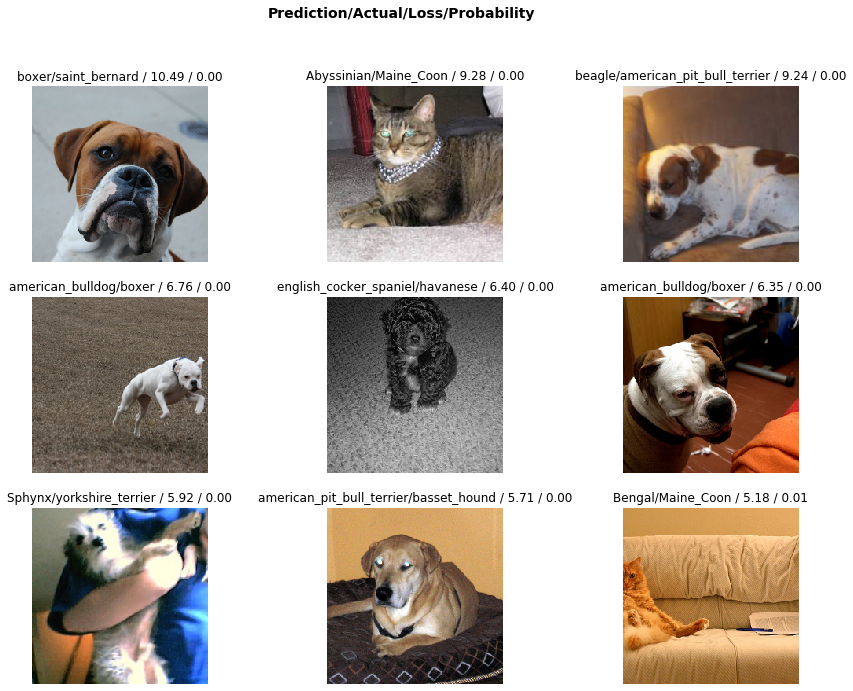

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

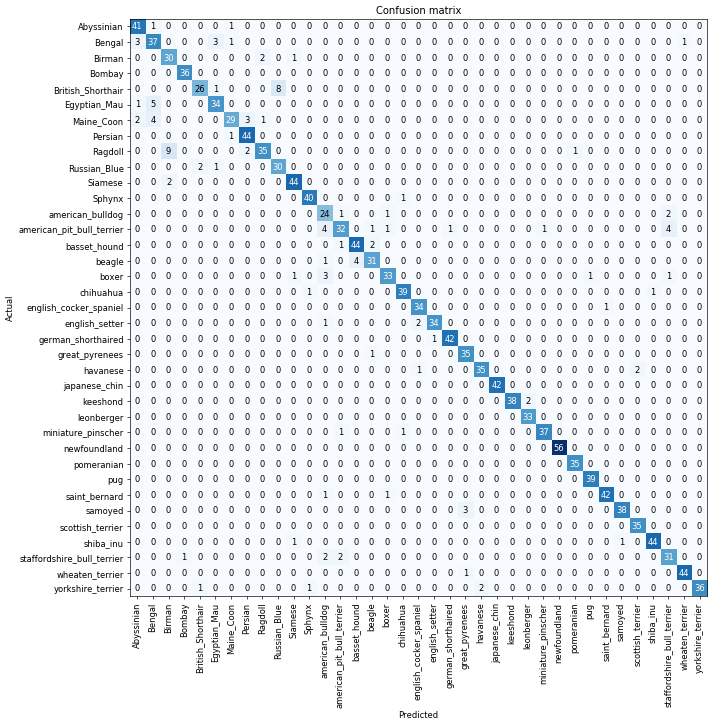

In [24]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [25]:
interp.most_confused(min_val=2)

[('Ragdoll', 'Birman', 9),
 ('British_Shorthair', 'Russian_Blue', 8),
 ('Egyptian_Mau', 'Bengal', 5),
 ('Maine_Coon', 'Bengal', 4),
 ('american_pit_bull_terrier', 'american_bulldog', 4),
 ('american_pit_bull_terrier', 'staffordshire_bull_terrier', 4),
 ('beagle', 'basset_hound', 4),
 ('Bengal', 'Abyssinian', 3),
 ('Bengal', 'Egyptian_Mau', 3),
 ('Maine_Coon', 'Persian', 3),
 ('boxer', 'american_bulldog', 3),
 ('samoyed', 'great_pyrenees', 3),
 ('Birman', 'Ragdoll', 2),
 ('Maine_Coon', 'Abyssinian', 2),
 ('Ragdoll', 'Persian', 2),
 ('Russian_Blue', 'British_Shorthair', 2),
 ('Siamese', 'Birman', 2),
 ('american_bulldog', 'staffordshire_bull_terrier', 2),
 ('basset_hound', 'beagle', 2),
 ('english_setter', 'english_cocker_spaniel', 2),
 ('havanese', 'scottish_terrier', 2),
 ('keeshond', 'leonberger', 2),
 ('staffordshire_bull_terrier', 'american_bulldog', 2),
 ('staffordshire_bull_terrier', 'american_pit_bull_terrier', 2),
 ('yorkshire_terrier', 'havanese', 2)]

## Unfreezing, fine-tuning, and learning rates

Unfreezing the learner will open the previously locked variables, hence it will train all layers.

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,error_rate,time
0,0.766766,0.818905,0.213802,00:39
1,0.461836,0.296751,0.090663,00:39


The error is worse after all layers are trained. It is because a pretrained models most likely to have very well trained layers, especially the first layers, hence retraining it might make it worse. To retrain a pretrained model it is better to use very slow learning rate for the first layers. 

How do we find good learning rate anyway?

We can use learning rate finder provided by fastai library.

In [28]:
learn.load('stage-1')

Learner(data=ImageDataBunch;

Train: LabelList (5912 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
samoyed,pug,staffordshire_bull_terrier,Bombay,beagle
Path: /root/.fastai/data/oxford-iiit-pet/images;

Valid: LabelList (1478 items)
x: ImageList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
beagle,scottish_terrier,basset_hound,havanese,basset_hound
Path: /root/.fastai/data/oxford-iiit-pet/images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


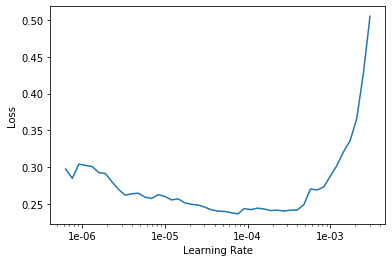

In [30]:
learn.recorder.plot()

After 10^-4 the loss gets worse.

In [31]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.232473,0.230229,0.079838,00:39
1,0.215948,0.229916,0.079161,00:39


The accuracy improved.

## Training: resnet50

`resnet50` will require more GPU memory, hence to make sure it runs, we should reduce the batch size to half.

In [32]:
data = ImageDataBunch.from_name_re(
    path_img,
    fnames,
    pattern,
    ds_tfms=get_transforms(),
    size=299,
    bs=bs//2
).normalize(imagenet_stats)

In [34]:
learn50 = cnn_learner(data, models.resnet50, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet50-19c8e357.pth" to /root/.cache/torch/checkpoints/resnet50-19c8e357.pth
100%|██████████| 97.8M/97.8M [00:14<00:00, 7.10MB/s]


In [36]:
learn50.fit_one_cycle(8)

epoch,train_loss,valid_loss,error_rate,time
0,0.741095,0.319514,0.110284,01:26
1,0.476715,0.236921,0.074425,01:28
2,0.428962,0.247329,0.078484,01:29
3,0.327481,0.219006,0.063599,01:29
4,0.255881,0.177130,0.058187,01:30
5,0.186539,0.156266,0.049391,01:29
6,0.146984,0.136490,0.044655,01:29
7,0.119039,0.134097,0.044655,01:29


The result is better than `resnet34` thanks to more variables in `resnet50`.

In [37]:
learn50.save('stage-1')

Let's check the learning rate finder.

In [38]:
learn50.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


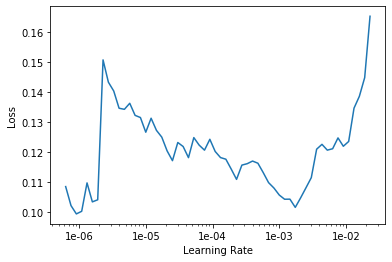

In [39]:
learn50.recorder.plot()

## Other data formats

There other formats of dataset arrangements. For example, the **MNIST** data which is arranged in folders.

In [40]:
mnist_path = untar_data(URLs.MNIST_SAMPLE)

In [41]:
mnist_path

PosixPath('/root/.fastai/data/mnist_sample')

In [42]:
tfms = get_transforms(do_flip=False)
mnist_data = ImageDataBunch.from_folder(mnist_path, ds_tfms=tfms, size=26)

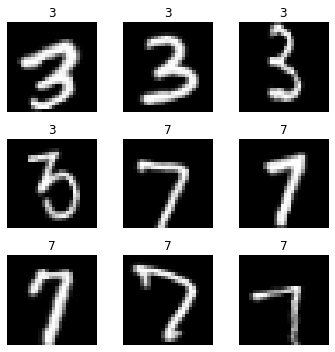

In [43]:
mnist_data.show_batch(rows=3, figsize=(5,5))

In [44]:
mnist_learn = cnn_learner(mnist_data, models.resnet18, metrics=accuracy)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/checkpoints/resnet18-5c106cde.pth
100%|██████████| 44.7M/44.7M [00:06<00:00, 7.24MB/s]


In [45]:
mnist_learn.fit_one_cycle(2)

epoch,train_loss,valid_loss,accuracy,time
0,0.261257,0.115338,0.957311,00:06
1,0.140653,0.083526,0.971541,00:05


The dataset provides the labels in a csv file as well.

In [48]:
mnist_path.ls()

[PosixPath('/root/.fastai/data/mnist_sample/labels.csv'),
 PosixPath('/root/.fastai/data/mnist_sample/valid'),
 PosixPath('/root/.fastai/data/mnist_sample/train')]

In [49]:
df = pd.read_csv(mnist_path/'labels.csv')

In [50]:
df.head()

,name,label
0,train/3/7463.png,0
1,train/3/21102.png,0
2,train/3/31559.png,0
3,train/3/46882.png,0
4,train/3/26209.png,0


In [51]:
csv_data = ImageDataBunch.from_csv(mnist_path, ds_tfms=tfms, size=28)

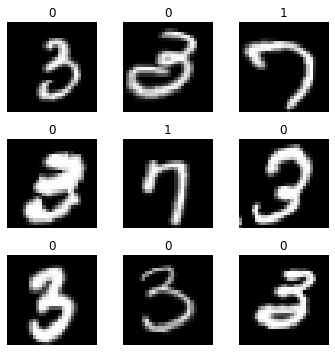

In [52]:
csv_data.show_batch(rows=3, figsize=(5,5))